<h1 align="center">Calor específico de sólidos</h1>
<div align="right">David A. Miranda, PhD<br>2021</div>

## 1. Importar librería

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.integrate as integrate
import scipy.constants as cte

## 2. Planteamiento del problema

### 2.1. Aproximación clásica
Sea un sólido a una temperatura $T$ tal que la separación $\Delta E_r$ entre las bandas de energía es mucho menor que la energía térmica, $\Delta E_r \ll k_BT$. Suponiendo que las vibracione moleculares al rededor de las posiciones de equilibrio del sólido se pueden modelar como osciladores armónicos, cada uno con energía $\frac{p^2}{2m} + \frac{1}{2}m\omega^2 r^2$, donde $p^2 = p_x^2 + p_y^2 + p_z^2$ y $r^2 = x^2 + y^2 + z^3$. El valor esperado de la energía, $\bar{E}$ por $\nu$ mole de sustancia está dado por:

$$\frac{\bar{E}}{\nu} = N_A \left\langle \frac{1}{2m}(p_x^2+p_y^2+p_z^2) + \frac{m\omega^2}{2}(x^2 + y^2 + z^2) \right\rangle$$

Al aplicar el teorema de equipartición, 

$$\frac{\bar{E}}{\nu} = N_A k_B T = 3RT$$

Como $\delta Q = d\bar{E}$, el calor específico a volumen constante $c_V = \left( \frac{\partial Q}{\partial T} \right)_V$, está dado por,

$$c_V = 3R \approx 25 JK^{-1}mole^{-1}$$

A esta expresión se le conoce como ley de Dulong-Petit.

### 2.2. Modelo de Einstein
El primero en realizar un tratamiento cuántico para determinar el calor específico de los sólidos fue Albert Einstein, quien asumió que todas las vibraciones están cuantizadas y ocurren con una misma frecuencia angular $\omega$.  La energía $E_n$ para un oscilador armónico cuántico, con frecuencia angular $\omega$ está dada por $E_n = \hbar \omega (n + 1/2)$. Suponiendo que el sólido está a temperatura $T$, el valor esperado de la energía $\bar{\epsilon}$ para un oscilador cuántico a temperatura $T$ se puede obtener a partir de la función de partición $Z$. 

$$Z = \sum_{n=0}^\infty {e^{-\beta\hbar\omega (n+1/2)}} = e^{-\beta\hbar\omega/2}\sum_{n=0}^\infty {x^n}=\frac{e^{-\beta\hbar\omega/2}}{1-e^{-\beta\hbar\omega}}$$

$$\bar{\epsilon} = - \frac{\partial ln (Z)}{\partial \beta} = \hbar\omega \left( \frac{1}{2} + \frac{1}{1-e^{-\beta\hbar\omega}} \right)$$

Para los $3N_A$ grados de libertad de $\nu$ mole de sustancia, el valor esperado de la energía del sólido $\bar{E}$ por moel es,

$$\frac{\bar{E}}{\nu} = 3N_A \bar{\epsilon} = 3N_A \hbar\omega \left( \frac{1}{2} + \frac{1}{1-e^{-\beta\hbar\omega}} \right)$$

Como $\delta Q = d\bar{E}$, el calor específico a volumen constante $c_V = \left( \frac{\partial Q}{\partial T} \right)_V$, está dado por,

$$c_V = 3R x^2 \frac{e^x}{\left( e^x - 1\right)^2}$$

Donde, $x=\frac{T_E}{T} = \frac{\hbar\omega}{k_BT}$, siendo $T_E$ la temperatura de Einstein.

### 2.3. Modelo de Debye
El segundo modelo cuántico para describir el calor específico fue propuesto por Debye.  En su modelo, Debye consideró que las vibraciones en un sólido a temperatura $T$ están cuantizadas (fonones) y se encuentran confinadas dentro del volumen ocupado por el sólido.  Siguiendo las ideas de Debye, los modos vibracionales en la caja tienen longitudes de onda $\lambda_n = \frac{2L}{n}$. La energía de un fonón $E_n = h\nu_n = \frac{hc_s}{\lambda_n} = \frac{h c_s}{2L} n$, donde $c_s$ es la velocidad del sonido en el sólido.  Los fonones obedecen la estadística de Bose-Einstein, por lo tanto, el valor esperado de la energía está dado por,

$$\bar{E} = \sum_{n=1}^\infty{3E_n f_{EB}}$$

Donde $f_{BE} = \left(e^{\frac{E_n}{k_BT}}-1\right)^{1/2}$ es la distribución de Bose-Einstein.  El calor específico molar a volumen constante $c_V$ está dado por,

$$ c_V = 3R \dot{D}_4\left( \frac{T_D}{T} \right) $$

Donde $T_D = \frac{hc_s}{2Lk_B} R$ es la temperatura de Debye y $\dot{D}_4(x) = 3 x^{-3} \int_0^x{\frac{x^4}{(e^t - 1)^2}dt}$.

## 3. Métodos y definiciones

In [2]:
R  = cte.R

In [3]:
def cv_Einstein(x):
    return 3 * R * x**2 * np.exp(x) / ( np.exp(x) - 1 )**2

In [4]:
def debye_dD4(x):
    sol = integrate.quad(
        lambda xi: np.power(xi, 4) / np.power(np.exp(xi) - 1., 2), 0.0, x)
    return 3 * sol[0] / x**3

In [5]:
def cv_Debye(x):
    dD4 = np.array([debye_dD4(xi) for xi in x])
    return 3 * R * dD4

## 4. Figuras

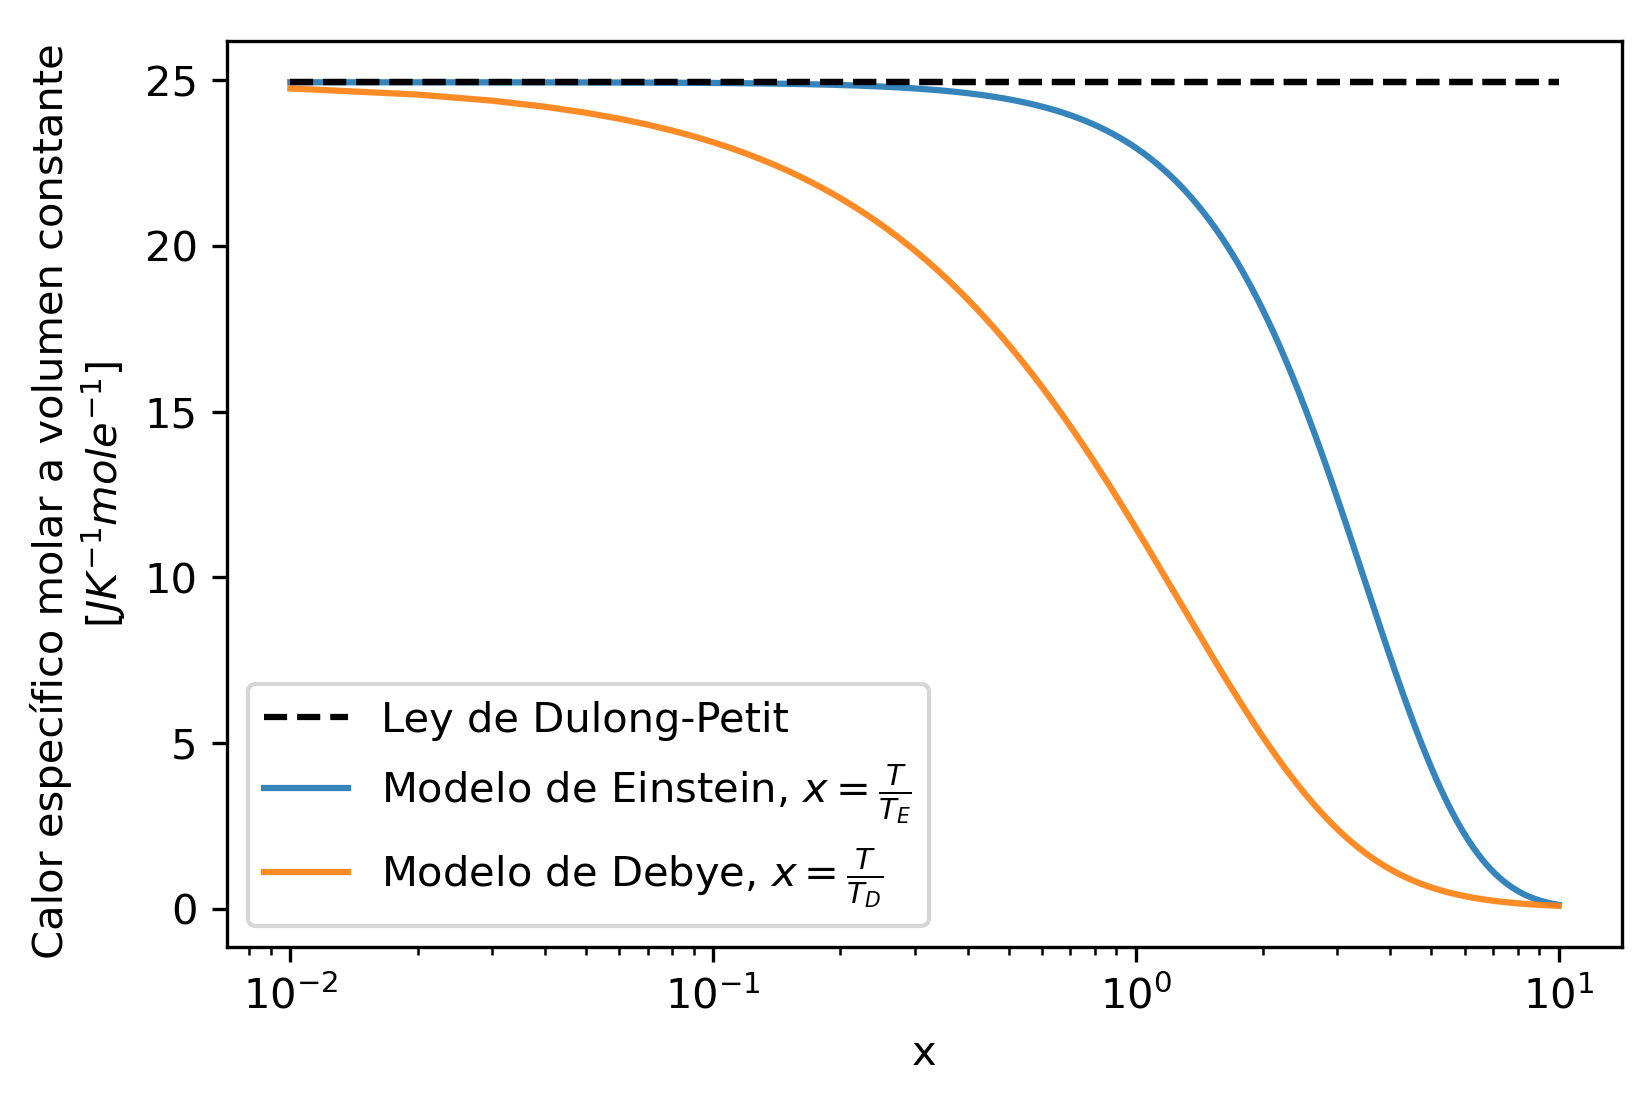

In [6]:
plt.figure(dpi=300)
x = np.linspace(1e-2, 10, 1000)
plt.semilogx(x, 3*R*np.ones(len(x)), '--k', label=r'Ley de Dulong-Petit')
plt.semilogx(x, cv_Einstein(x), label=r'Modelo de Einstein, $x = \frac{T}{T_E}$', alpha=0.9)
plt.semilogx(x, cv_Debye(x), label=r'Modelo de Debye, $x = \frac{T}{T_D}$', alpha=0.9)
plt.semilogx(x, 3*R*np.ones(len(x)), '--k')
plt.legend()
plt.xlabel('x')
_ = plt.ylabel('Calor específico molar a volumen constante \n$[J K^{-1} mole^{-1}]$')

## 5. Preguntas de autoexplicación

5.1. En sus propias palabras, plantee el problema que resuelve este ejemplo trabajado.

5.2. Describa los métodos que implementan las ecuaciones del ítem 2.

5.3. En la figura, ¿cuál es el significado físico de $x$ cuando tiende a cero y cómo se relaciona con temperaturas altas?

5.4. En la figura, ¿cuál es el significado físico de $x \gg 1$ y cómo se relaciona con temperaturas bajas?

5.5. Demuestre que tanto el modelo de Debye como el de Einstein tienden a $3R$ cuando la temperatura es suficientemente alta. ¿En qué se diferencian los modelos de Einstein y Debye?

End!